# Data Processing And Exploratory Data Analytics

## Importing Libraries

In [24]:
import os
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['figure.dpi'] = 350
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

## Loading Dataset

In [25]:
csv_path = os.path.join(os.path.dirname(os.getcwd()),'Datasets', 'spam.csv')
spam_dataset = pd.read_csv(csv_path)

spam_dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [26]:
def lost_record(original_Size, Current_Size):

    lost = original_Size - Current_Size
    lost = (lost/original_Size)*100
    lost = round(lost, 2)

    return print('We lost ' + str(lost) + '% data')

## Analyzing Dataset

In [27]:
df = spam_dataset.copy()

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [29]:
for i in df.columns:
    print('\n Column Name :' + str(i))
    print(" Total no of unique values :" + str(len(df[i].unique())))
    print(df[i].unique())


 Column Name :label
 Total no of unique values :2
['ham' 'spam']

 Column Name :message
 Total no of unique values :5169
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']


### Finding Duplicate value in Dataset

In [30]:
df[df.duplicated()]

,label,message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


#### Droping and Re-Arranging The Dataset

In [31]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

df.tail()

,label,message
5164,spam,This is the 2nd time we have tried 2 contact u...
5165,ham,Will ü b going to esplanade fr home?
5166,ham,"Pity, * was in mood for that. So...any other s..."
5167,ham,The guy did some bitching but I acted like i'd...
5168,ham,Rofl. Its true to its name


In [32]:
lost_record(original_Size = spam_dataset.shape[0], Current_Size = df.shape[0])

We lost 7.23% data


- we found 403 duplicate values in are dataset
- we will be losing 7.23% of are data

### Finding Null value in Dataset

In [33]:
for i in df.columns:
    print('\n Column Name :' + str(i))
    print(" Total no of null values : " + str(df[i].isna().sum()))


 Column Name :label
 Total no of null values : 0

 Column Name :message
 Total no of null values : 0


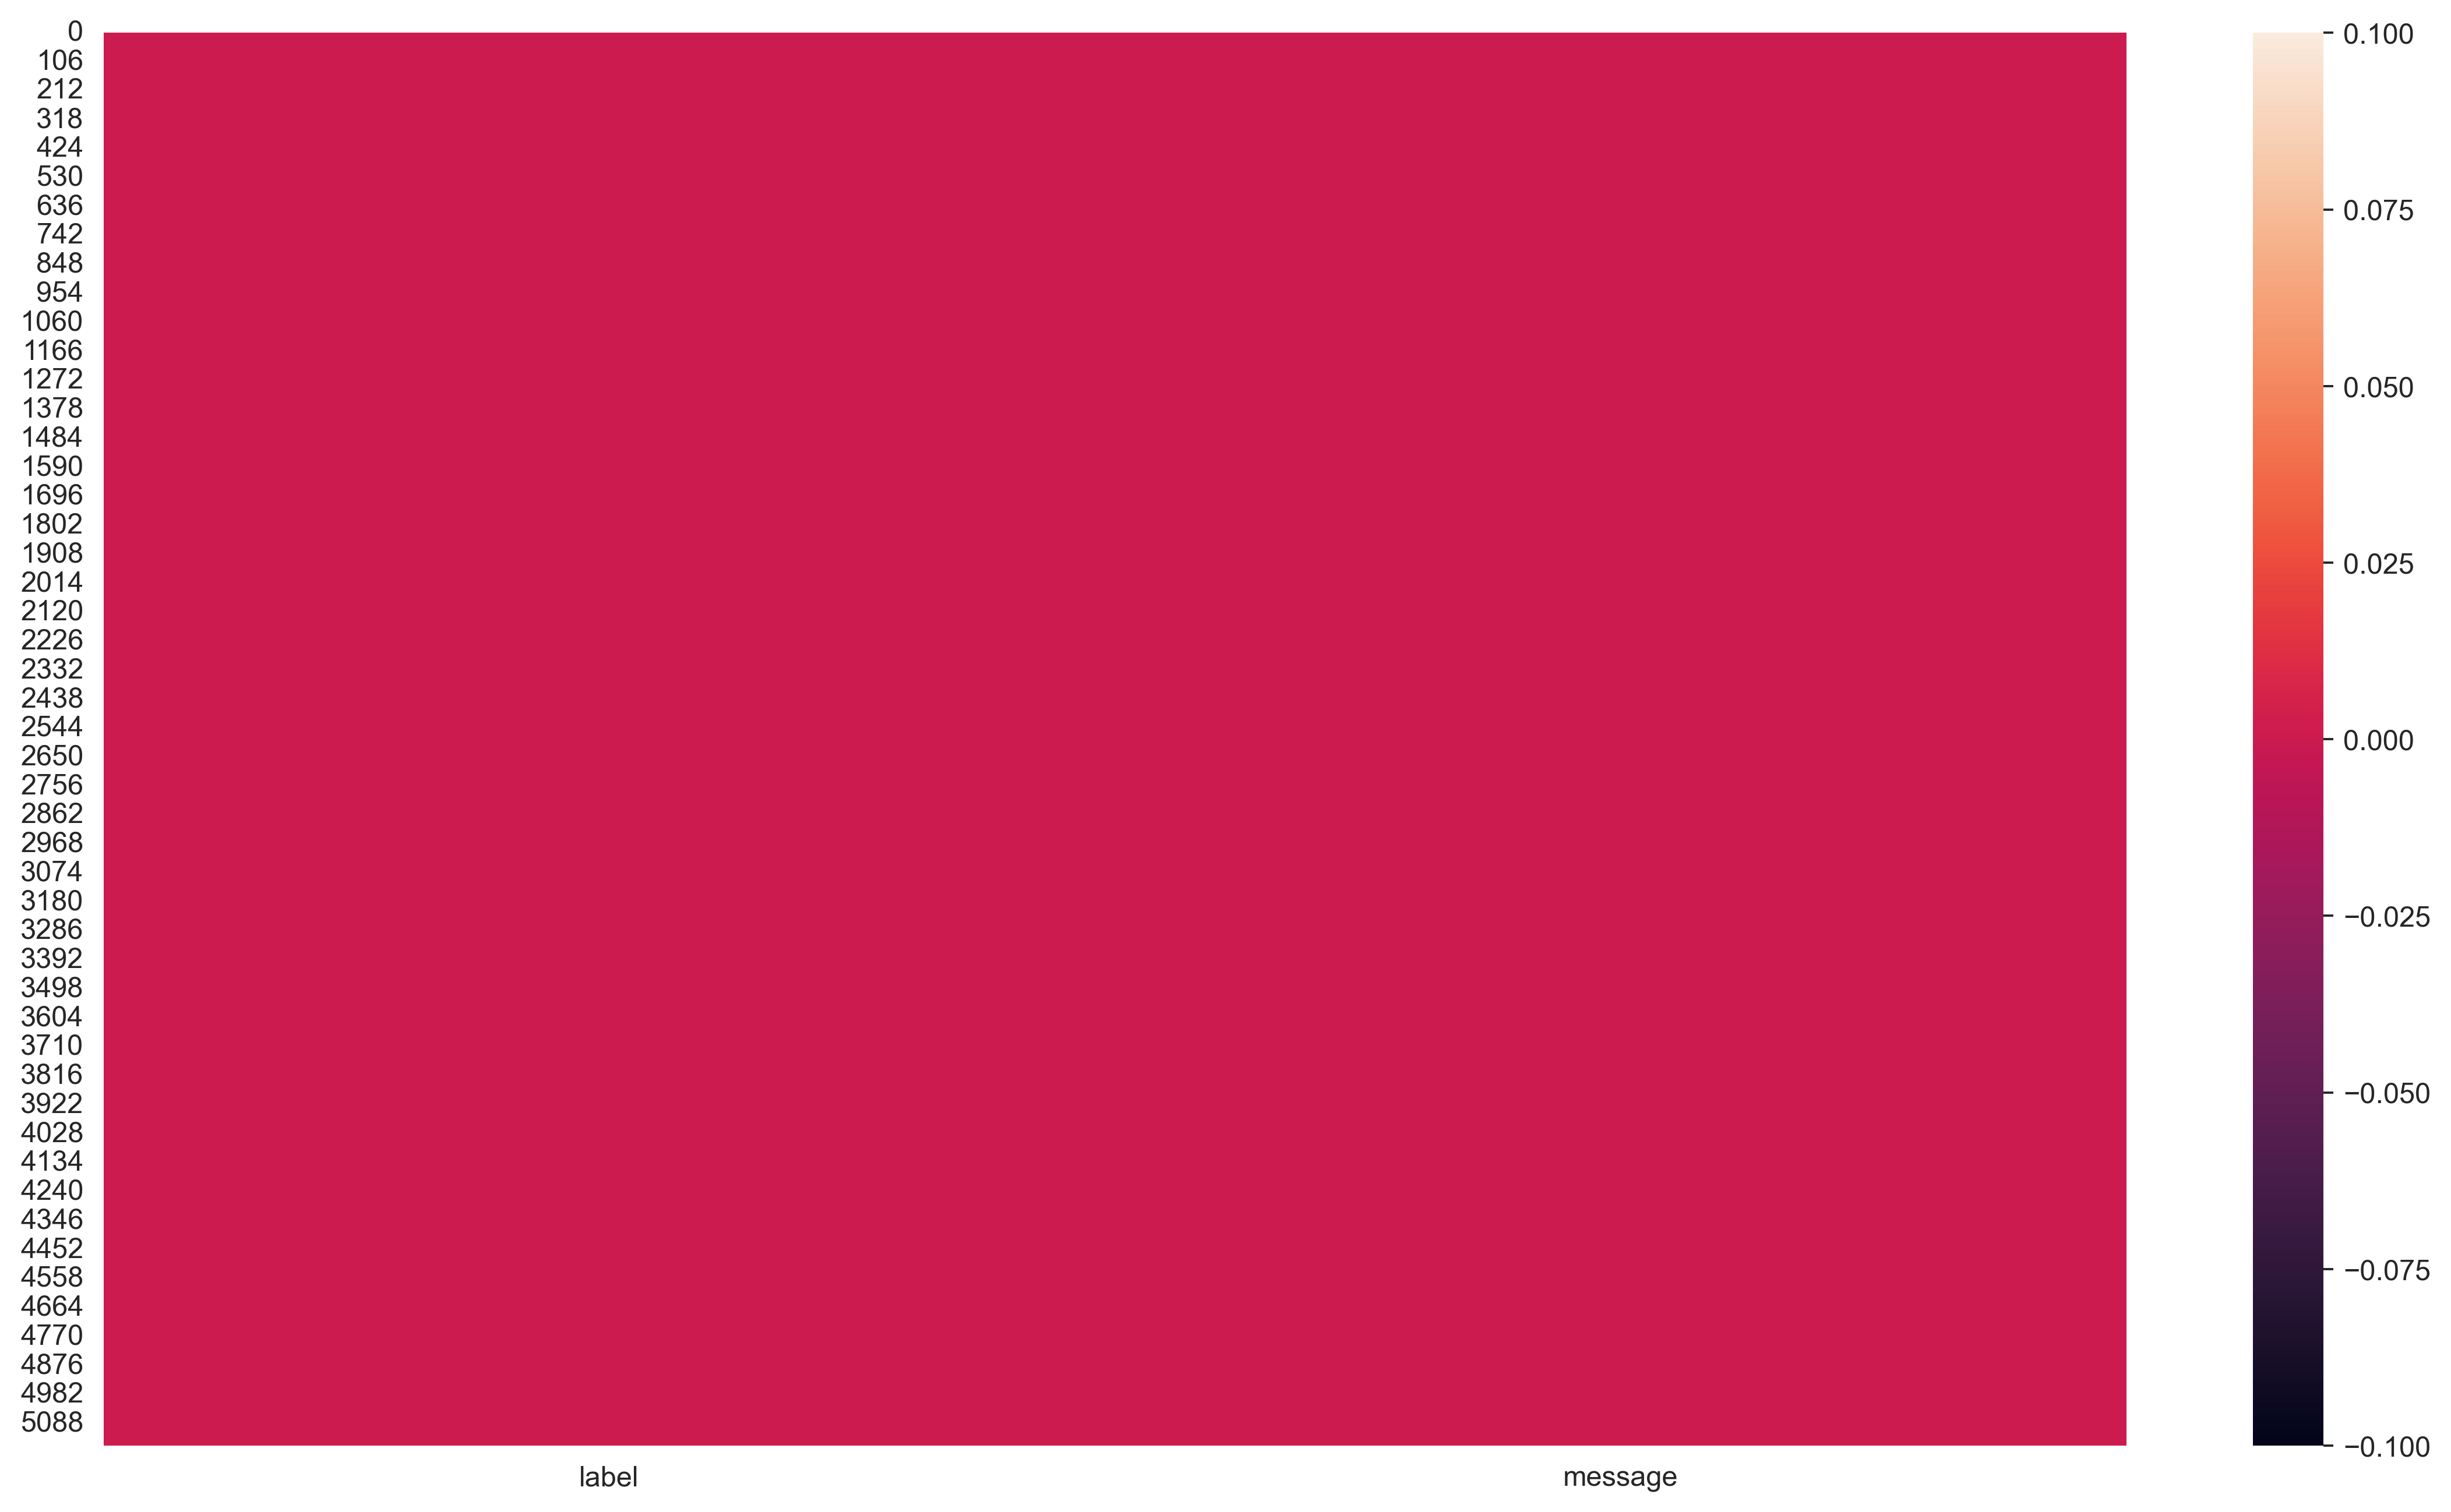

In [34]:
sns.heatmap(df.isna(), annot=False)

plt.show()

## Data Preprocessing

### Applying Lemmatization And Removing Stopword

In [35]:
lemma = WordNetLemmatizer()

corpus = []

for i in range(len(df)):
    msg = re.sub('[^a-zA-Z]', ' ', df['message'][i])
    msg = msg.lower()
    msg = msg.split()

    msg = [lemma.lemmatize(word) for word in msg if word not in stopwords.words('english')]
    msg = ' '.join(msg)
    corpus.append(msg)

corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

## Data Visualization

In [36]:
def worldcloud(data):
    txt = ' '.join(data)
    stop = STOPWORDS
    
    wc = WordCloud(background_color='white',stopwords=stop).generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

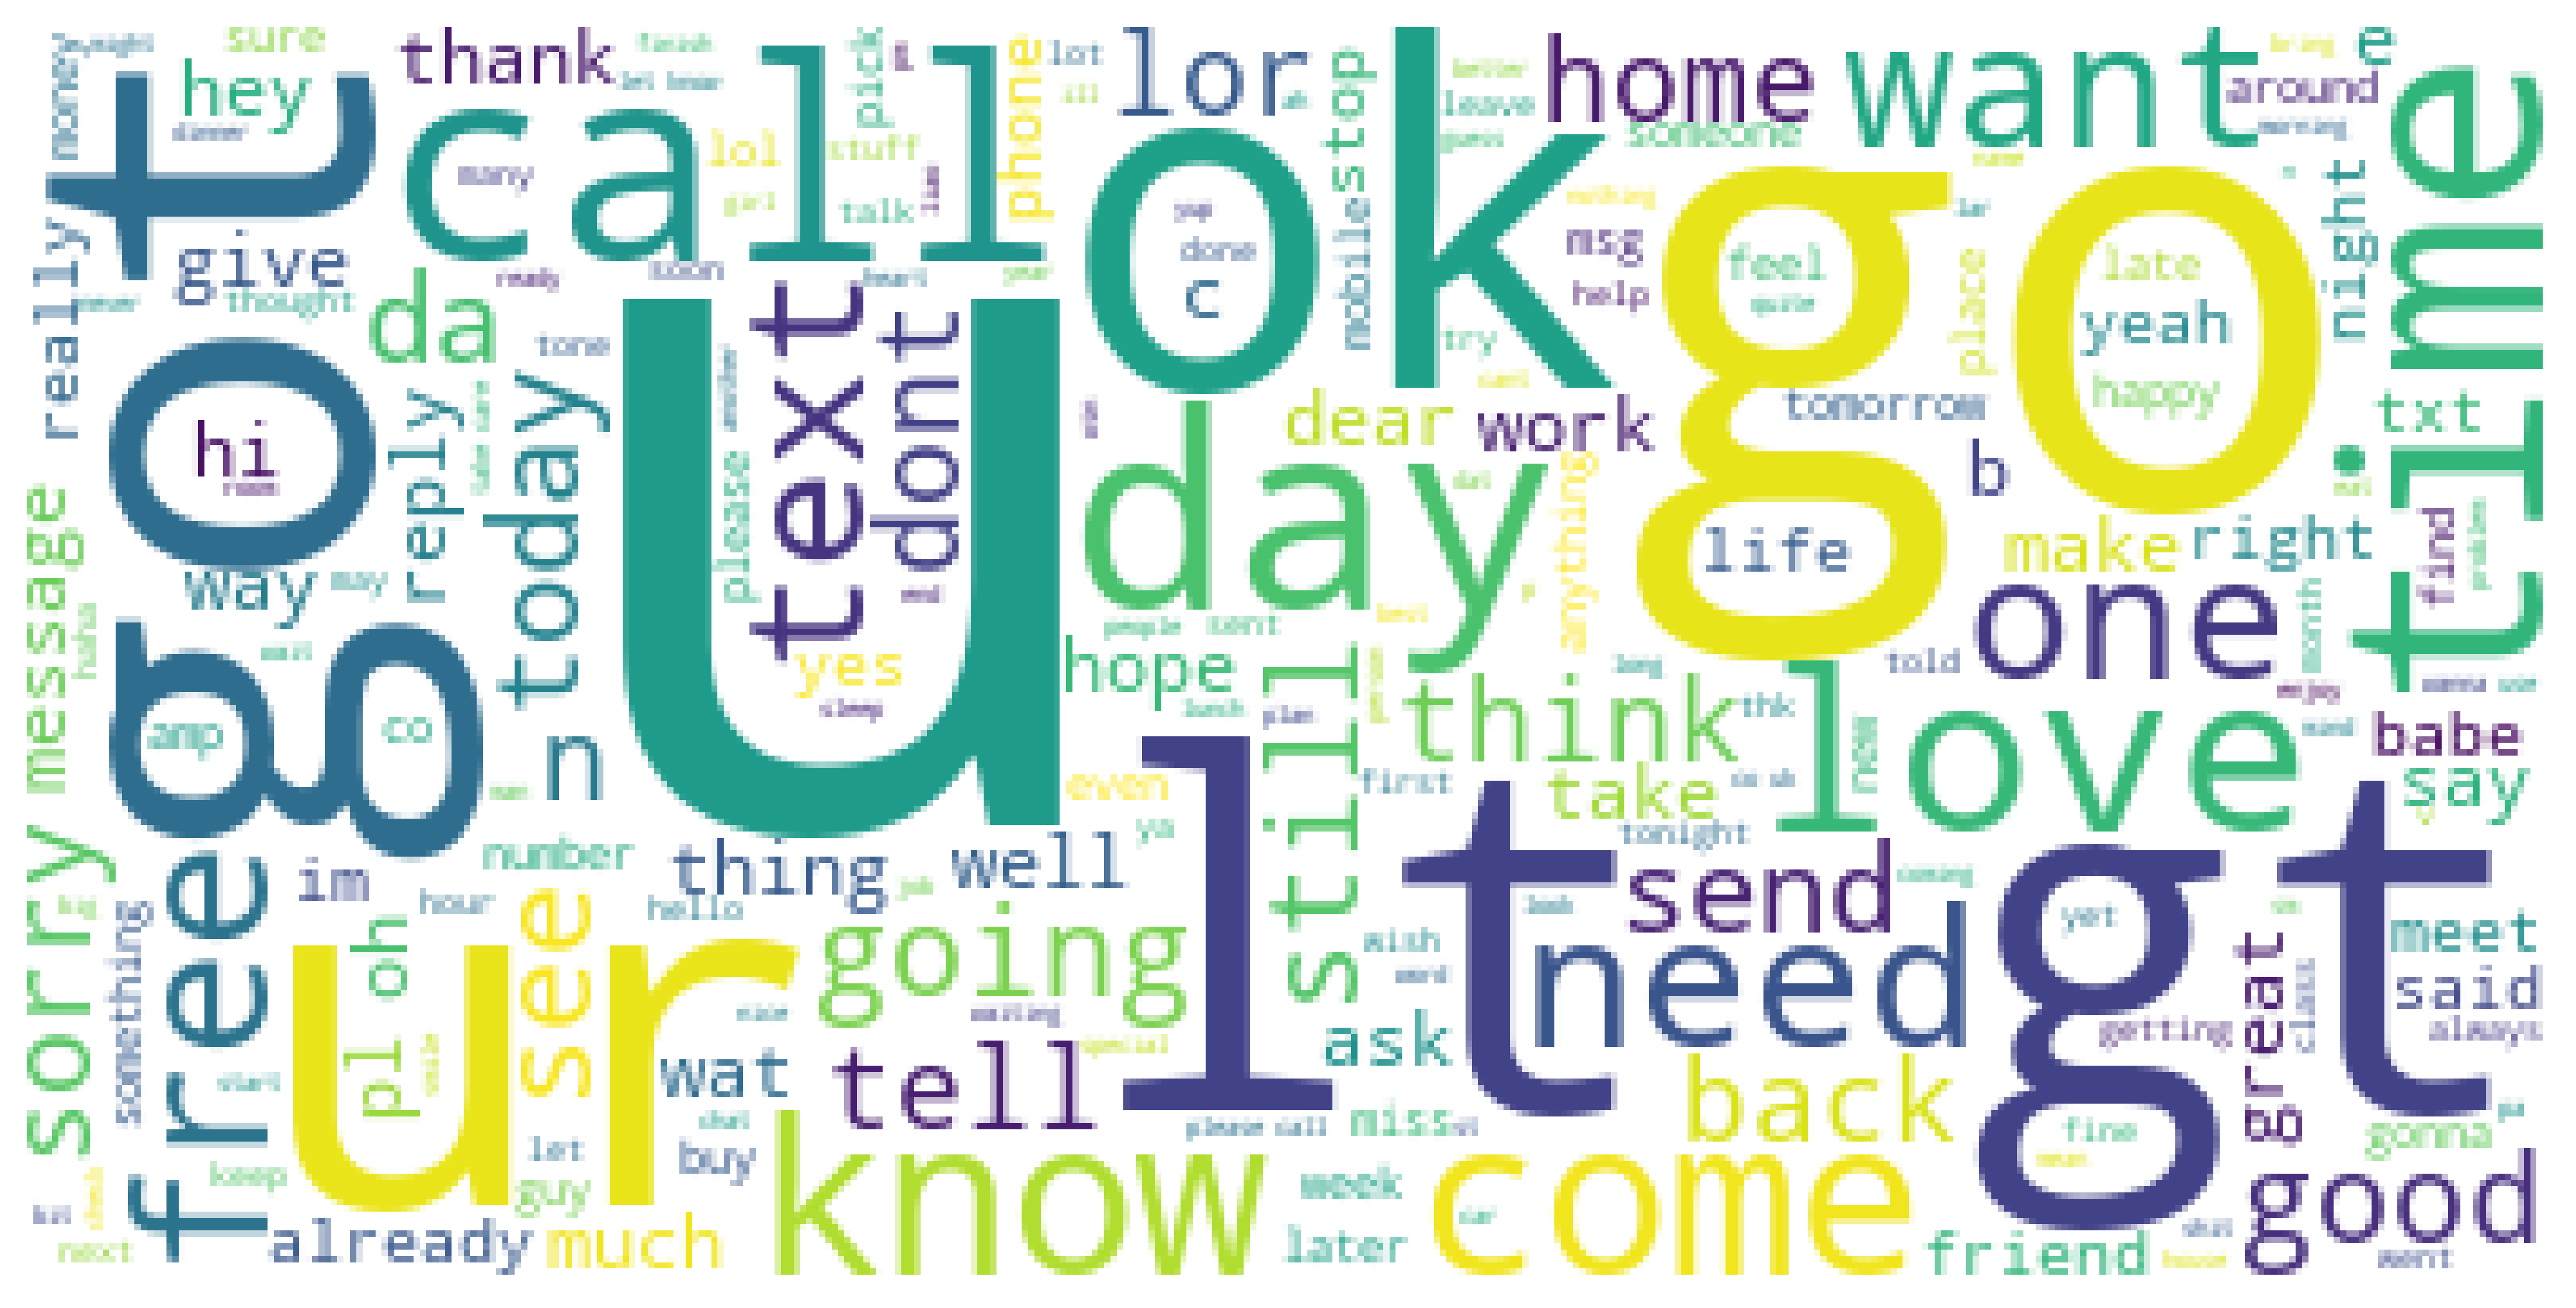

In [37]:
worldcloud(corpus)

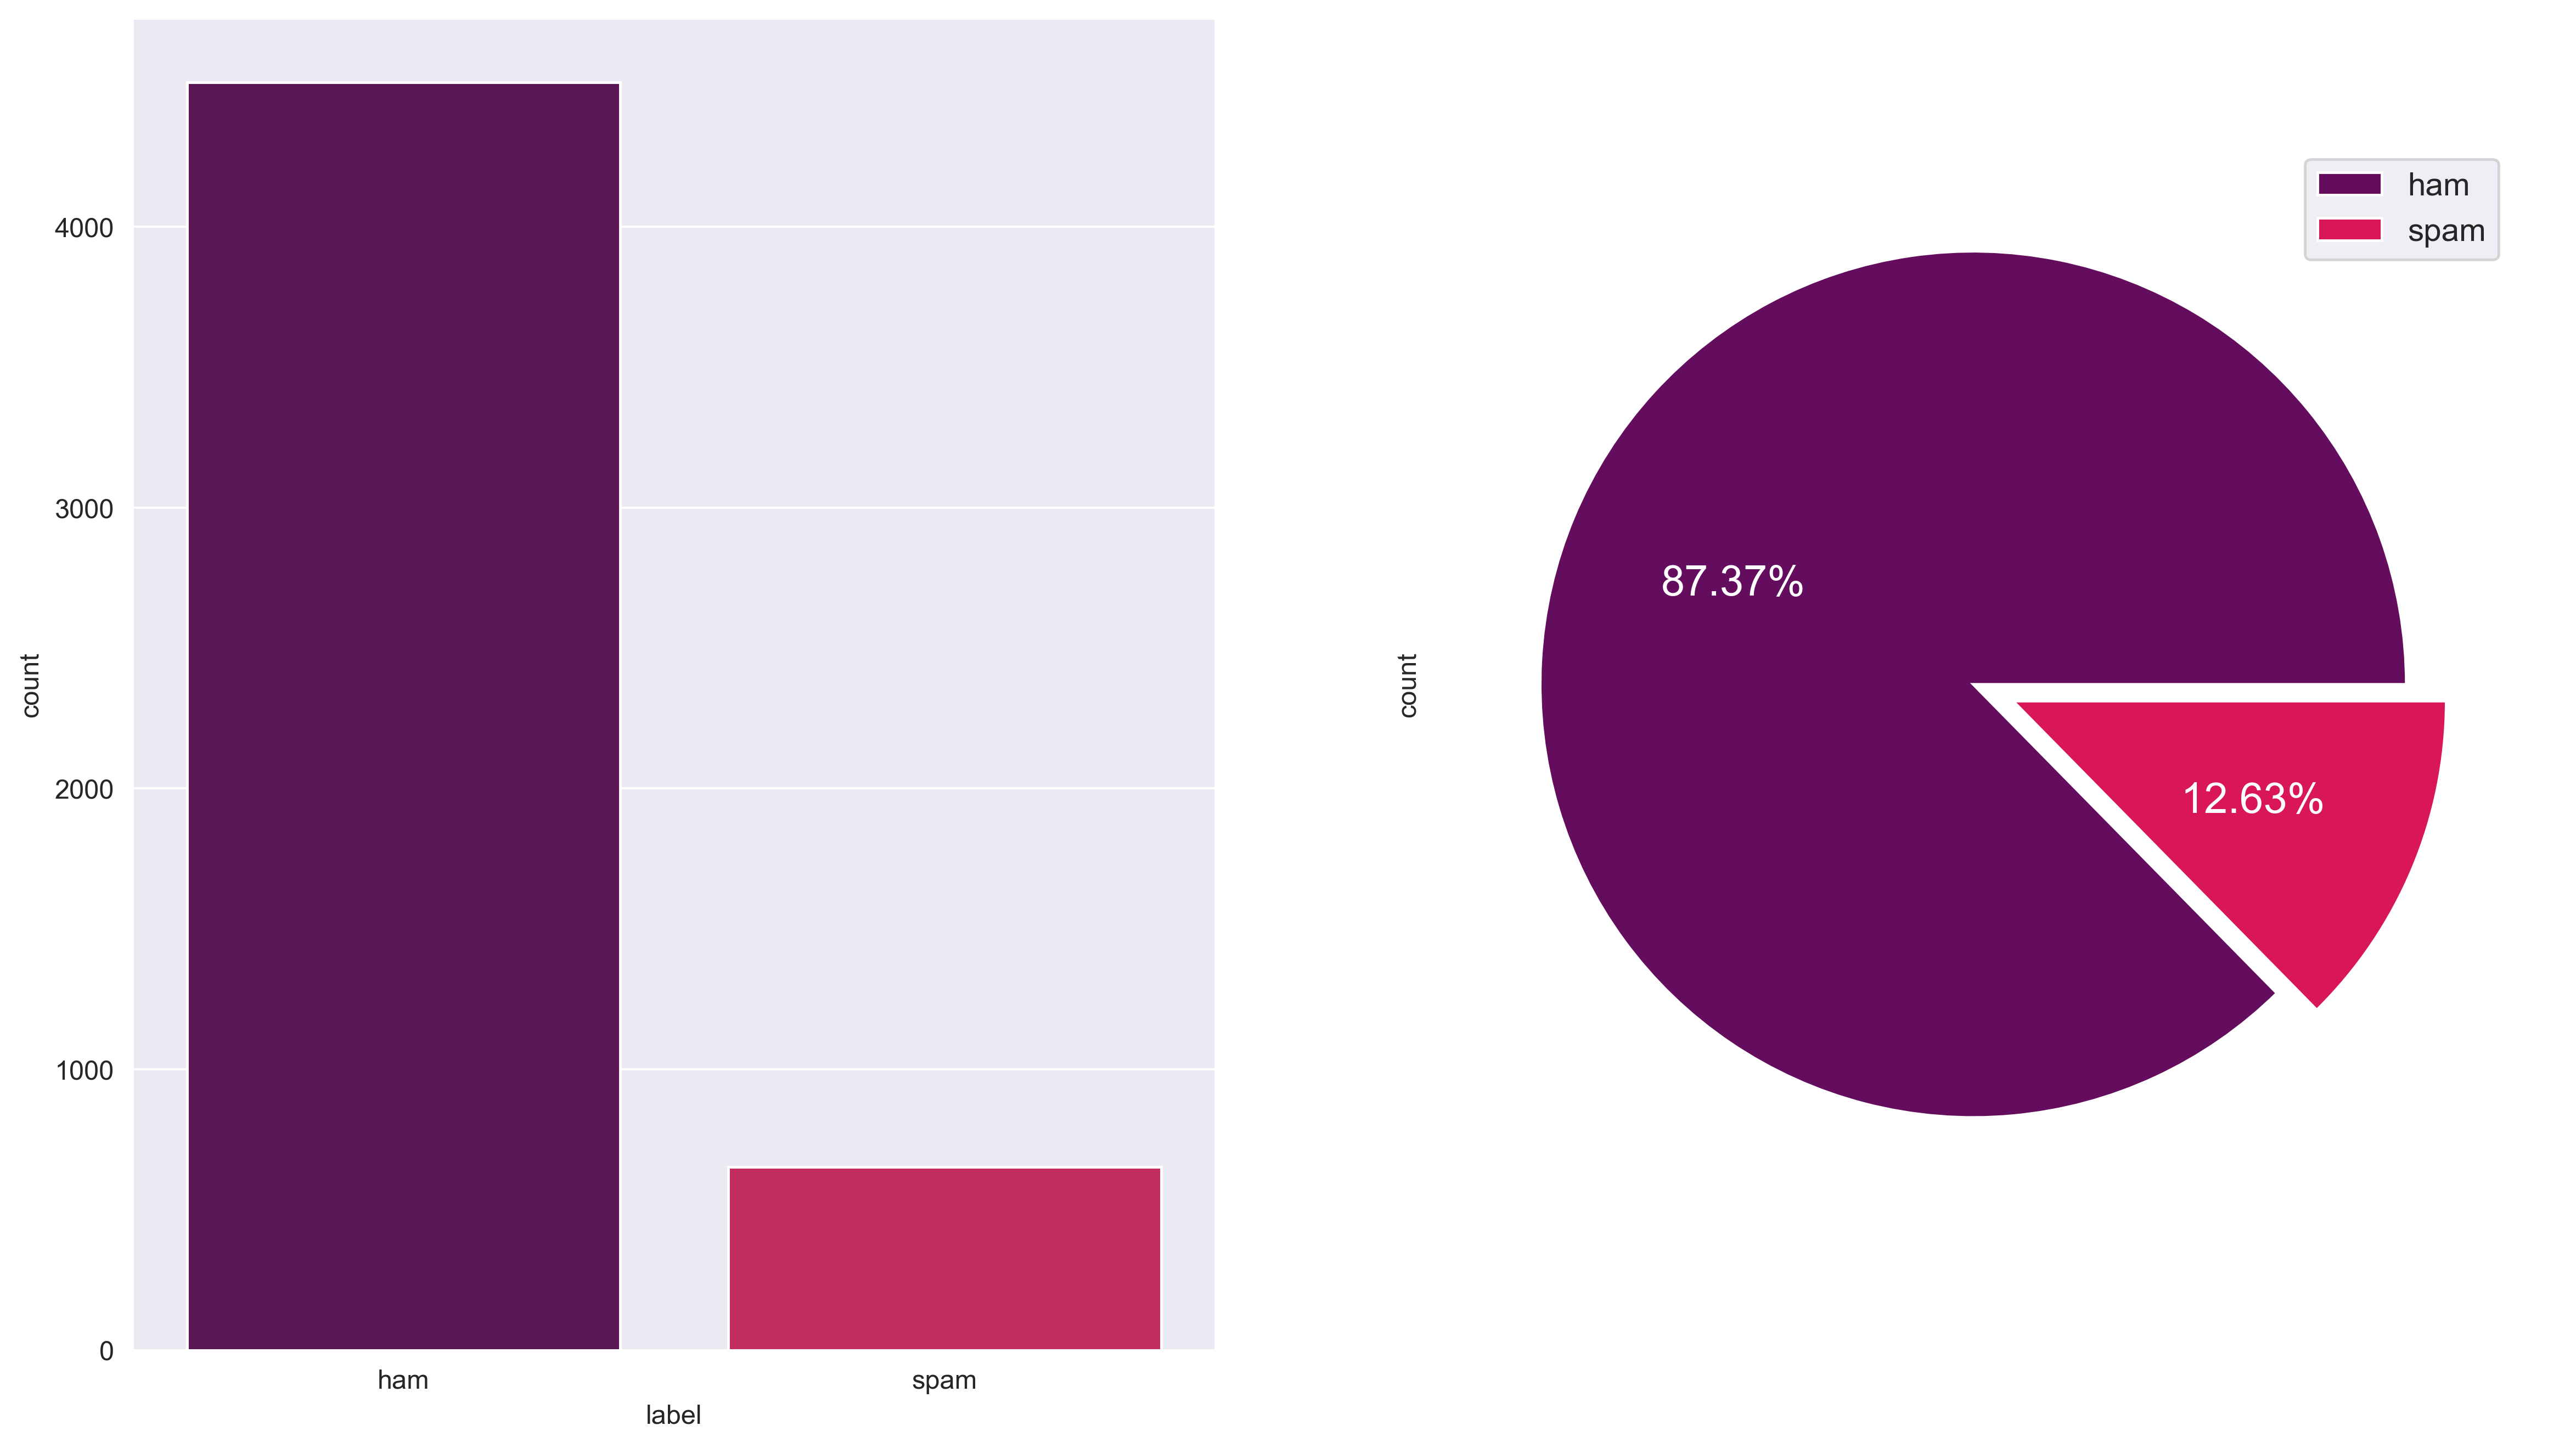

In [46]:
fig, ax = plt.subplots(ncols=2)
sns.countplot(data = df, x = 'label', ax=ax[0], palette=['#640D5F', '#D91656'], hue='label')
df['label'].value_counts().plot(kind='pie', autopct = '%.2f%%', ax = ax[1],colors=['#640D5F', '#D91656'], explode=[0.0,0.1],textprops={'color': 'white'},fontsize=16)
ax[1].legend(df['label'].value_counts().index, loc="best", fontsize=12)

plt.show()

## Creating CSV File

In [39]:
# df_corpus = pd.DataFrame(corpus, columns= ['message'])
# df_corpus['label'] =df['label']

# df_corpus.to_csv('cleaned_spam_data.csv', index=False)